In [1]:
import numpy as np
from cmath import log
import qiskit as q

## Basic Circuit Composition

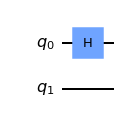

In [5]:
circ1 = q.QuantumCircuit(2)
circ1.h(0)
circ1.draw()

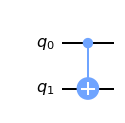

In [6]:
circ2 = q.QuantumCircuit(2)
circ2.cnot(0,1)
circ2.draw()

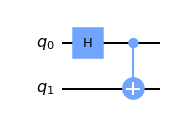

In [8]:
(circ1 + circ2).draw()

# Picking up the Pieces

In [50]:
def init(qreg, areg):
    state = np.zeros(2**qreg.size)
    state[2] = 1
    circ = q.QuantumCircuit(qreg, areg)
    circ.initialize(state, qreg)
    return circ

In [54]:
def C(type_, lambda_, qreg, areg):
    circ = q.QuantumCircuit(qreg, areg)
    
    return circ

In [55]:
def RL(type_, qreg, areg):
    return q.QuantumCircuit(qreg, areg)

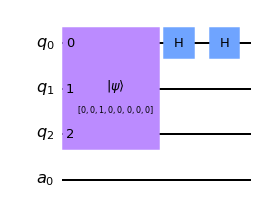

In [56]:
n_phi = 3
#n_qubits = n_phi + 1
qreg = q.QuantumRegister(n_phi, 'q')
areg = q.QuantumRegister(1, 'a')
lambda_1 = log(0.6+0.8).imag
lambda_2 = log(0.6-0.8).imag

circ = init(qreg, areg) + C(1, lambda_1, qreg, areg) + C(2, lambda_2, qreg, areg) + \
       RL('R', qreg, areg) + RL('L', qreg, areg)
circ.draw()